# Simulaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.cm as cm
import rie_estimator

## Función para generar dinámicamente una matriz en bloques (diagonales son cero)

In [2]:
def make_corr_matrix(groups: list, corrs: list)->np.ndarray:
    mat_holder = np.zeros(shape=(sum(groups), sum(groups)))
    for index,group in enumerate(groups):
        if index == 0:
            myrange = list(range(0, group))
            index_i = 0
            index_j = 0
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
        else:
            myrange = list(range(sum(groups[:index]), sum(groups[:index+1])))
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
    np.fill_diagonal(mat_holder, 1.0)
    return mat_holder

### ejemplos

In [3]:
make_corr_matrix([4,2,2], [0.2, 0.3,0.4])

array([[1. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 1. , 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 1. ]])

In [4]:
make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])

array([[1. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 1. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 1. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.7, 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 1. ]])

## Simulando retornos a través de cholensky

In [5]:
#corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
#number_of_obs = 500
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
number_of_obs = 900
number_of_assets = corr_matrix.shape[0]
# En caso de que la matriz sea distinta de cero 
#means = np.zeros(number_of_assets)
Means = np.full((number_of_obs, number_of_assets), 0)

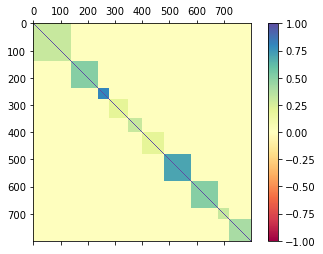

In [6]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [7]:
Z = np.random.normal(size = number_of_assets * number_of_obs)
Z.shape

(720000,)

In [8]:
Z = Z.reshape((number_of_assets,number_of_obs))
Z.shape

(800, 900)

In [9]:
L = np.linalg.cholesky(corr_matrix)
L.shape

(800, 800)

In [10]:
daily_returns =  Means.T + np.inner(L, np.transpose(Z))

In [11]:
sample_corr = np.corrcoef(daily_returns)

In [12]:
rie_corr = rie_estimator.get_rie(returns=daily_returns.T, normalize=False, max_ones= False)

In [13]:
daily_returns.min()

-4.923115972522943

In [14]:
daily_returns.mean()

0.006236151373710868

In [15]:
daily_returns.max()

4.294852896720483

<AxesSubplot:ylabel='Density'>

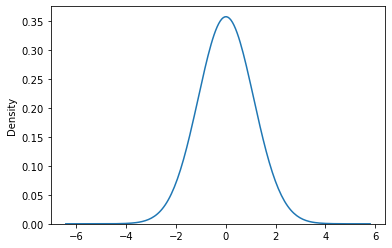

In [16]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

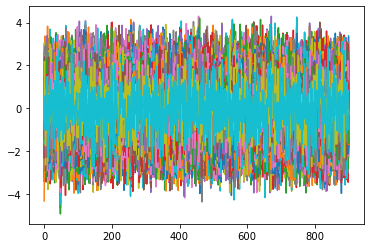

In [17]:
plt.plot(daily_returns.T);

In [18]:
daily_returns.shape

(800, 900)

Mostrando el estimador de correlación muestral

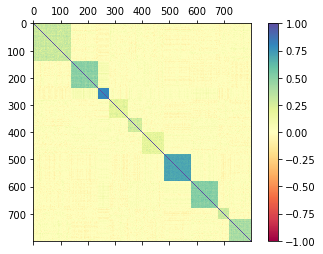

In [19]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(sample_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

Mostrando el estimador de correlación del RIE:

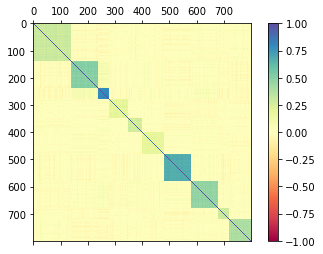

In [20]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [21]:
print(np.linalg.norm(((corr_matrix - sample_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

26.03520352205545
22.313673525610174


## TODO
- Distancia de frobenius promedio (sobre distintas realizaciones)
- Gráfica de mapeo de los valores propios ( es equivalente)
- Se pueden mostrar escenarios distintos (tanto en el número de bloques, q)

## Simulando retornos con una normal mutlivariada

In [22]:
#corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])

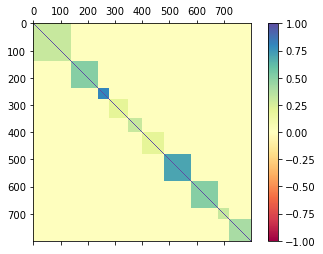

In [23]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [24]:
daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=900)

In [25]:
daily_returns.shape

(900, 800)

In [26]:
est_corr = np.corrcoef(daily_returns.T)

In [27]:
rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)

<AxesSubplot:ylabel='Density'>

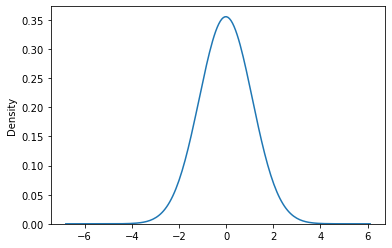

In [28]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

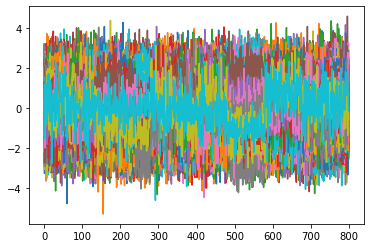

In [29]:
plt.plot(daily_returns.T);

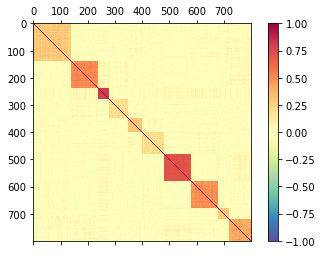

In [30]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(est_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

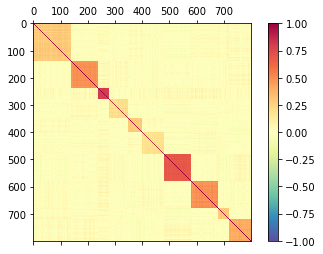

In [31]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

In [32]:
print(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

26.30465695923152
21.441959707770454


In [33]:
eigen_true = np.linalg.eigvalsh(corr_matrix)
eigen_sample = np.linalg.eigvalsh(est_corr)
eigen_rie = np.linalg.eigvalsh(rie_corr)
eigen_true.sort()
eigen_sample.sort()
eigen_rie.sort()


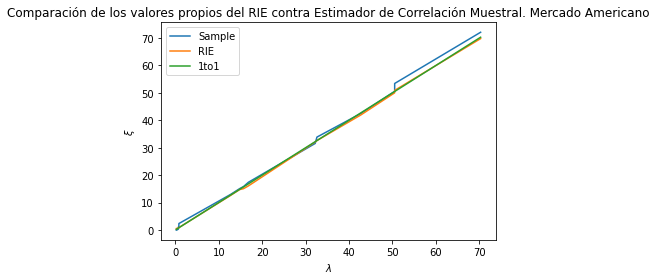

In [34]:
fig, ax = plt.subplots(1,1)
ax.plot(eigen_true,eigen_sample)
ax.plot(eigen_true,eigen_rie)
ax.plot(eigen_true,eigen_true)
#ax = sns.lineplot(x = eigen_true, y = eigen_sample)
#ax = sns.lineplot(x = eigen_true, y = eigen_rie)
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['Sample', 'RIE', "1to1"])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


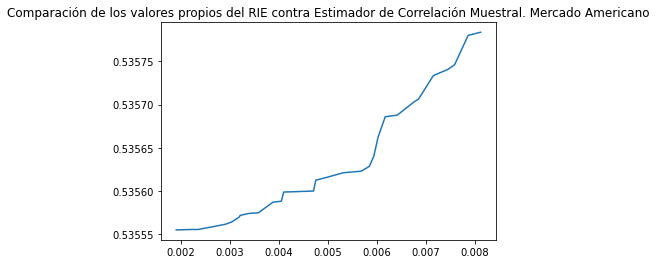

In [35]:
ax = sns.lineplot(x = eigen_sample[:30], y = eigen_rie[:30])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.show()


In [59]:
corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])
num_obs = 900
num_simul = 100

In [60]:
frob_muestral = []
frob_rie = []
vals_propios_muestral = []
vals_propios_rie = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns, normalize=False, max_ones= False)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)

In [75]:
np.mean(frob_muestral)

26.30930429128958

In [74]:
np.mean(frob_rie)

22.153813719149397

In [72]:
np.std(frob_muestral)

0.553823481063547

In [73]:
np.std(frob_rie)

1.7302591385498376

In [65]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_muestral.shape

(100, 800)

In [66]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()

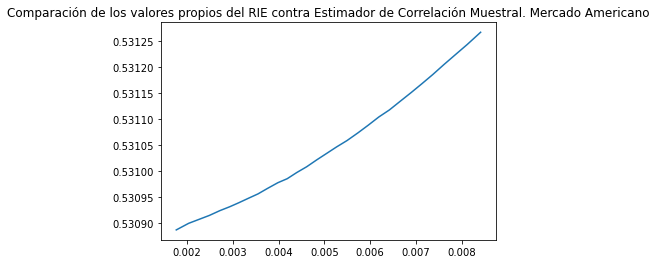

In [67]:
ax = sns.lineplot(x = means_vals_propios_muestral[:30], y = means_vals_propios_rie[:30])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.show()


In [68]:
means_vals_propios_rie.min()

0.5308862116395648

In [69]:
eigen_true.min()

0.19999999999999643

In [70]:
means_vals_propios_muestral.min()

0.0017659271954644673

In [46]:
means_vals_propios_rie[:10]

array([0.52868904, 0.52870688, 0.52871319, 0.52873053, 0.52874886,
       0.52876024, 0.52876636, 0.52878163, 0.52879001, 0.52881049])

In [47]:
eigen_sample[:10]

array([0.00185787, 0.00218892, 0.00265217, 0.00270617, 0.00289607,
       0.00315874, 0.00316859, 0.00327776, 0.0037291 , 0.00385769])

In [48]:
eigen_true[:10]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [49]:
means_vals_propios_muestral[:10]

array([0.00173006, 0.00205112, 0.00225969, 0.00249304, 0.00278535,
       0.00301765, 0.0031401 , 0.00336434, 0.00357447, 0.0038075 ])

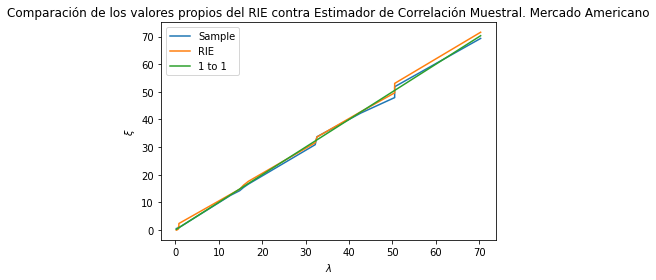

In [71]:
fig, ax = plt.subplots(1,1)
ax.plot( eigen_true, means_vals_propios_rie)
ax.plot( eigen_true, means_vals_propios_muestral)
ax.plot(eigen_true, eigen_true)
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['Sample', 'RIE', '1 to 1'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()
